In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Esercizio 9.1

## The traveling salesman problem (TSP)

In questo esercizio vogliamo risolvere il $\textbf{problema del commesso viaggiatore}$: esso è la ricerca del cammino che minimizza la distanza che deve percorrere il commesso viaggiatore tra $N$ città: possiamo misurare la distanza percorsa in un cammino tramite la:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2 
$$

e usare un algoritmo genetico per risolvere il problema, dove ovviamente, nel calcolare la distanza totale di un cammino, dobbiamo considerare che $\vec{x}_{N+1}=\vec{x}_1$.

### Algoritmi genetici
Un algoritmo genetico è un algoritmo capace di risolvere un determinato problema emulando il processo di evoluzione delle specie. Nel caso del commesso viaggiatore esisterà pertanto una " popolazione" di cammini iniziale da cui partiamo. Ad ognuno di essi associamo una misura della loro "predominanza", associandola ovviamente alla lunghezza del cammino. Noi vogliamo infatti che cammini più corti abbiamo più probabilità di sopravvivere e generare nuovi individui. 

Nello specifico la procedura seguita dall'algoritmo sviluppato per risolvere questo problema è:
- creare una popolazione iniziale
- valutare ogni cammino secondo la formula proposta sopra
- selezionare due individui secondo :
   $$v_{path}=rL^{(2)}$$
   con $r$ estratto in $[0.8,1]$. L'individuo della popolazione con $v_{path}$ minore sarà quello selezionato. Viene ripetuta la procedura per trovare un secondo individuo, con la richiesta aggiuntiva che i due non siano uguali. Questa funzione mescola una parte di selezione casuale e una parte di selezione basata sulla lunghezza del cammino. Non è stato estratto un numero in un intervallo più ampio per evitare che la scelta fosse eccessivamente casuale.
- eseguire con probabilità $P_c$ un crossover, ovvero dividere in due parti i cammini e tenerne una invariata e l'altra spostare le città presenti secondo l'ordine di quelle nell'algtro cammino. In tal modo i due genitori genereranno due nuovi cammini.
- si ripetono gli ultimi due punti fino a riavere $N$ individui
- scorrere la popolazione ed eseguire con probabilità $P_m$ una mutazione delle quattro proposte. (vedere paragrafo dedicato)
- ripetere la procedura per un numero di generazioni $n$



#### Scelta dei parametri dell'algoritmo
Il numero di generazioni è stato fissato a $n=400$ .

La probabilità di crossover è stata impostata a $P_c=0.95$ (provando ad eseguire l'algoritmo con varie combinazioni risulta piuttosto lento ad arrivare a risultati accettabili per probabilità basse) e la probabilità di mutazione a $P_c=0.05$ ( al contrario probabilità alte scombussolavano la normale selezione verso generazioni migliori in maniera eccessiva).

Il numero di città è fissato su richiesta dell'esercizio a $N=32$

I parametri della simulazione sono modificabili nel file "settings.C", eccettuato il numero di elementi nella popolazione e il numero di città.

#### Mutazioni
Le mutazioni previste sono quattro:
- Permutazione di due città: si scelgono due città in un cammino e si inverte la loro posizione
- Permutazione multipla: Esegue la prima mutazione un numero $m$ di volte sul cammino basato su quanto la valutazione del cammino sia buona rispetto al migliore: in media permuterà più città se il cammino è molto peggiore del migliore
- Permutazione contigua: si scelgono $n$ città e le si permutano con altre $n$
- Inversione: si scelgono $n$ città e si inverte la loro posizione

$\textbf{oss}$: la posizione della prima città è sempre invariata dopo una mutazione. Questo per evitare che l'algoritmo si "perda" nella degenerazione dovuta all'invarianza della lunghezza del cammino per traslazione di tutte le città.

Eseguiamo dapprima l'algoritmo su delle città poste su una circonferenza: sarà facile in questo caso avere feedback sulla giusta risoluzione del problema, poichè ci aspettiamo che il cammino più corto colleghi le  città il più possibile vicino alla circonferenza stessa.

Successivamente applichiamo l'algoritmo a città scelte casualmente in un quadrato.

In [2]:
x,y=np.loadtxt("bestcircle.dat",unpack=True)
x0,y0=np.loadtxt("bestcircle.dat",unpack=True,max_rows=1)
x=np.append(x,x0) #aggiungiamo in fondo l'ultimo cammino
y=np.append(y,y0)

(-1.3, 1.3)

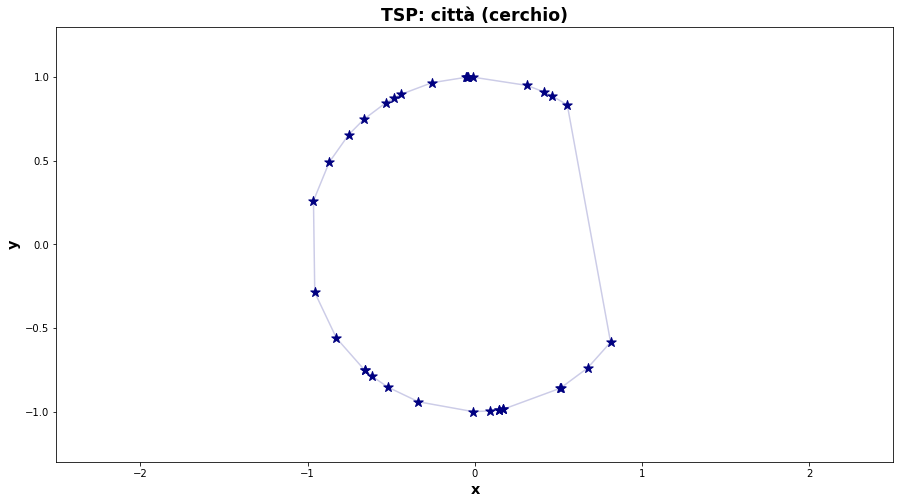

In [3]:
plt.figure(figsize=(15,8))
plt.plot(x,y, color='darkblue', alpha=0.2)
#plt.subplot(121)
plt.scatter(x,y, marker='*', s=100, color="navy",  cmap='gnuplot')
plt.xlabel('x', weight="bold", size="x-large")
plt.ylabel('y', weight="bold", size="x-large")
plt.axis("equal")
plt.title('TSP: città (cerchio)', weight="bold", size="xx-large")
plt.ylim(-1.3,1.3)
plt.xlim(-1.3,1.3)

In [4]:
x,y=np.loadtxt("bestsquare.dat",unpack=True)
x0,y0=np.loadtxt("bestsquare.dat",unpack=True,max_rows=1)
x=np.append(x,x0)
y=np.append(y,y0)


Text(0.5, 1.0, 'TSP: città (quadrato)')

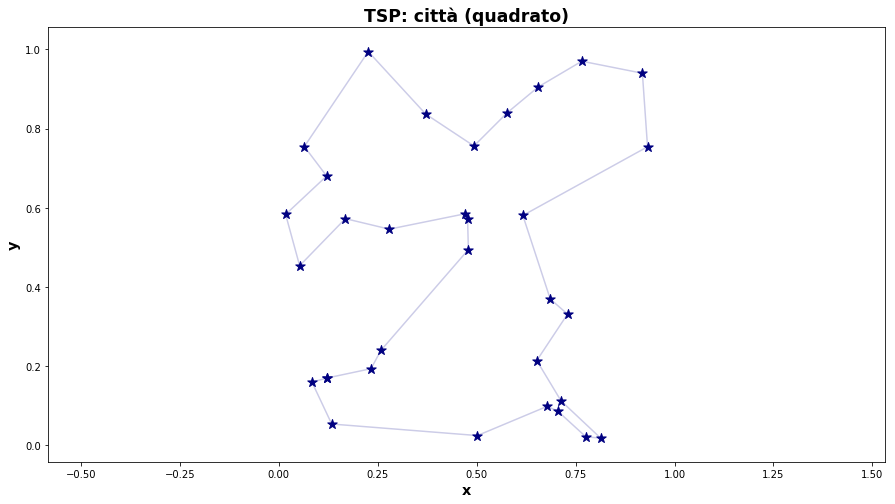

In [5]:
plt.figure(figsize=(15,8))
plt.plot(x,y, color='darkblue', alpha=0.2)
#plt.subplot(121)
plt.scatter(x,y, marker='*', s=100, color="navy",  cmap='gnuplot')
plt.xlabel('x', weight="bold", size="x-large")
plt.ylabel('y', weight="bold", size="x-large")
plt.axis("equal")
plt.title('TSP: città (quadrato)', weight="bold", size="xx-large")


Come si può notare le soluzioni appaiono ragionevoli e non vi è ragione di dubitare che quello proposto sia davvero il cammino più corto.

Verifichiamo l'andamento di $L^{(2)}$ ad ogni step dell'algoritmo:


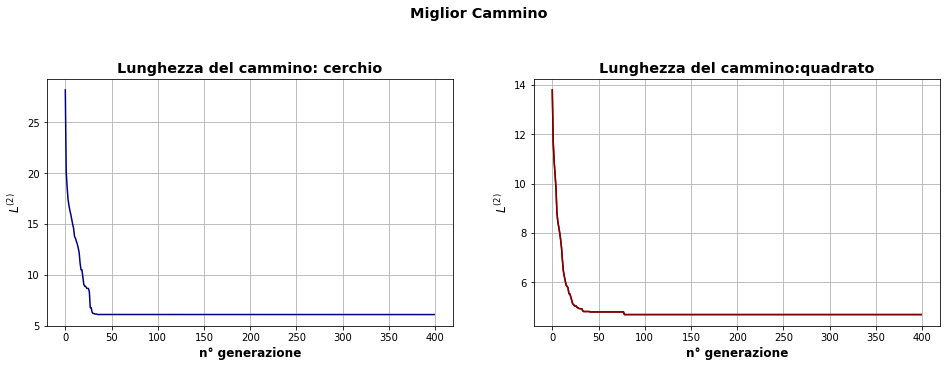

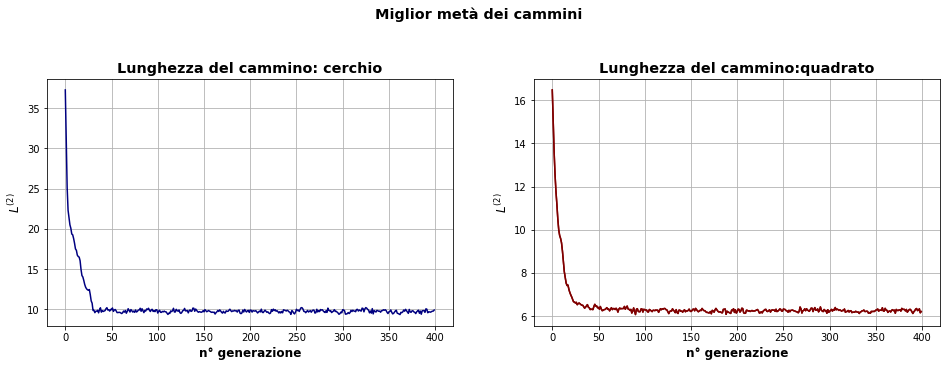

In [6]:
plt.figure(figsize=(16,10))
plt.suptitle("Miglior Cammino",weight="bold",size="x-large")
plt.subplot(221)
l2circle=np.loadtxt("l2circle.dat")
plt.grid(True)
plt.title("Lunghezza del cammino: cerchio",weight="bold",size="x-large")
plt.xlabel("n° generazione", weight="bold",size="large")
plt.ylabel("$L^{(2)}$", weight="bold",size="large")
plt.plot(l2circle,color="navy")


plt.subplot(222)
l2square=np.loadtxt("l2square.dat")
plt.plot(l2square,color="maroon")
plt.title("Lunghezza del cammino:quadrato",weight="bold",size="x-large")
plt.grid(True)
plt.xlabel("n° generazione", weight="bold",size="large")
plt.ylabel("$L^{(2)}$", weight="bold",size="large")
plt.plot(l2square,color="maroon")


plt.figure(figsize=(16,10))
plt.suptitle("Miglior metà dei cammini",weight="bold",size="x-large")
plt.subplot(221)
l2circle=np.loadtxt("l2_besthalfcircle.dat")
plt.grid(True)
plt.title("Lunghezza del cammino: cerchio",weight="bold",size="x-large")
plt.xlabel("n° generazione", weight="bold",size="large")
plt.ylabel("$L^{(2)}$", weight="bold",size="large")
plt.plot(l2circle,color="navy")


plt.subplot(222)
l2square=np.loadtxt("l2_besthalfsquare.dat")
plt.plot(l2square,color="maroon")
plt.title("Lunghezza del cammino:quadrato",weight="bold",size="x-large")
plt.grid(True)
plt.xlabel("n° generazione", weight="bold",size="large")
plt.ylabel("$L^{(2)}$", weight="bold",size="large")
plt.plot(l2square,color="maroon")

Le oscillazioni nella miglior metà dei cammini sono probabilmente da ricondursi all'effetto delle mutazioni. In ogni caso si può notare come l'algoritmo abbia in realtà bisogno di meno di un centinaio di cammini per convergere.